In [274]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(rc={'figure.figsize':(10,5)})
%matplotlib inline

In [275]:
data = pd.read_csv('Cleaned_Data_Merchant_Level.csv')
data

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Id
0,1,20140,2014.0,362,362,Fashion,21053,0
1,1,11200,1120.0,371,368,Fashion,26472,0
2,2,8500,850.0,368,368,Fashion,26472,0
3,1,1980,198.0,558,34,Fashion,27075,0
4,1,2400,240.0,413,413,Fashion,27417,0
...,...,...,...,...,...,...,...,...
43667,1,3050,305.0,27,27,F&B,26865,55
43668,1,3120,312.0,31,31,F&B,27128,55
43669,1,1200,120.0,25,25,F&B,28814,55
43670,1,20,2.0,2,2,Other,29107,56


In [276]:
data.info() # Check data types and missing values
data.describe().T # Check summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43672 entries, 0 to 43671
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Trx_Rank             43672 non-null  int64  
 1   Points               43672 non-null  int64  
 2   Trx_Vlu              43672 non-null  float64
 3   Trx_Age              43672 non-null  int64  
 4   Customer_Age         43672 non-null  int64  
 5   Category In English  43672 non-null  object 
 6   User_Id              43672 non-null  int64  
 7   Mer_Id               43672 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 2.7+ MB


,count,mean,std,min,25%,50%,75%,max
Trx_Rank,43672.0,1.265227,0.776549,1.0,1.00,1.00,1.00,17.0
Points,43672.0,3312.249748,5756.374137,20.0,1220.00,1893.50,3100.00,263800.0
Trx_Vlu,43672.0,331.224975,575.637414,2.0,122.00,189.35,310.00,26380.0
Trx_Age,43672.0,185.186664,121.989540,1.0,62.00,203.00,271.00,698.0
Customer_Age,43672.0,144.027844,114.764448,1.0,34.00,115.00,252.00,682.0
User_Id,43672.0,17173.411889,9665.399084,0.0,8710.75,17561.00,25634.25,33518.0
Mer_Id,43672.0,16.277111,16.099288,0.0,8.00,8.00,26.00,56.0


In [277]:
data.duplicated().sum() # Check duplicate

0

<Axes: xlabel='Trx_Rank', ylabel='count'>

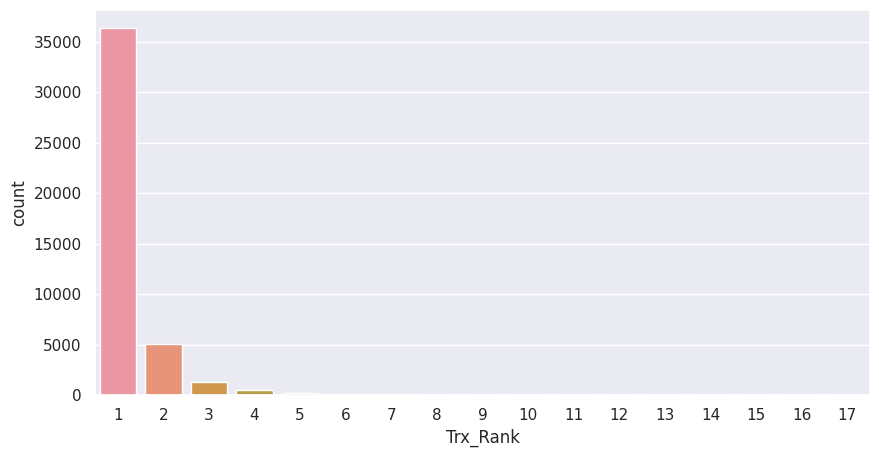

In [278]:
sns.countplot(data=data, x='Trx_Rank')

In [279]:
data['Points'].describe()

count     43672.000000
mean       3312.249748
std        5756.374137
min          20.000000
25%        1220.000000
50%        1893.500000
75%        3100.000000
max      263800.000000
Name: Points, dtype: float64

<Axes: xlabel='Points', ylabel='Count'>

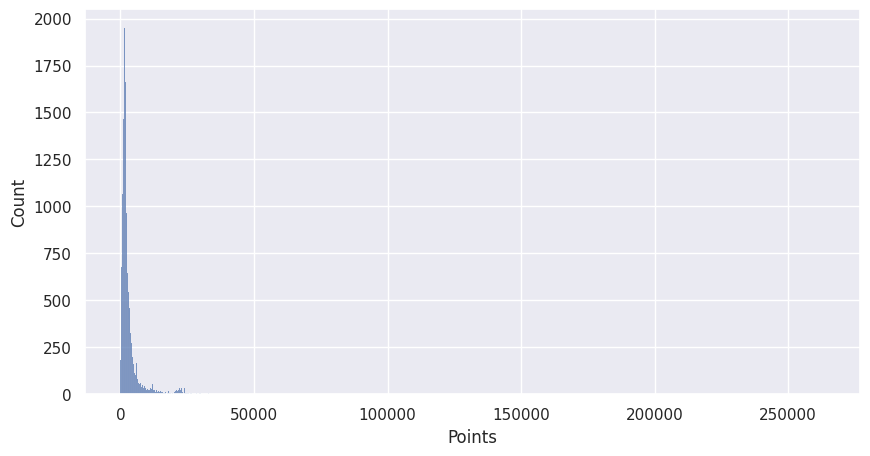

In [280]:
sns.histplot(data['Points'])

In [281]:
data['Points'].describe()

count     43672.000000
mean       3312.249748
std        5756.374137
min          20.000000
25%        1220.000000
50%        1893.500000
75%        3100.000000
max      263800.000000
Name: Points, dtype: float64

<Axes: xlabel='Points'>

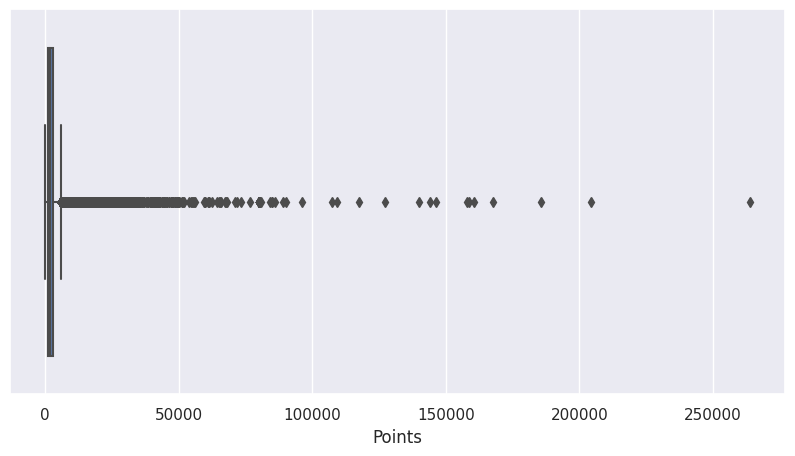

In [282]:
sns.boxplot(x=data['Points'])

In [283]:
data[data['Points']>=50000]

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Id
3053,1,55177,5517.7,251,251,Grocery,13724,3
10716,1,51180,5118.0,251,41,Grocery,452,8
10717,2,204460,20446.0,41,41,Grocery,452,8
10738,1,54500,5450.0,27,27,Grocery,496,8
12453,4,62340,6234.0,221,12,Grocery,3478,8
...,...,...,...,...,...,...,...,...
38838,1,60800,6080.0,277,41,Electronics,452,46
38851,1,89000,8900.0,325,41,Electronics,4952,46
38893,1,51670,5167.0,269,15,Electronics,13617,46
38990,1,80940,8094.0,86,86,Fashion,3231,47


In [284]:
data['Trx_Vlu'].describe()

count    43672.000000
mean       331.224975
std        575.637414
min          2.000000
25%        122.000000
50%        189.350000
75%        310.000000
max      26380.000000
Name: Trx_Vlu, dtype: float64

In [285]:
data['Trx_Age'].describe()

count    43672.000000
mean       185.186664
std        121.989540
min          1.000000
25%         62.000000
50%        203.000000
75%        271.000000
max        698.000000
Name: Trx_Age, dtype: float64

In [286]:
data['Customer_Age'].describe()

count    43672.000000
mean       144.027844
std        114.764448
min          1.000000
25%         34.000000
50%        115.000000
75%        252.000000
max        682.000000
Name: Customer_Age, dtype: float64

<Axes: xlabel='Category In English', ylabel='count'>

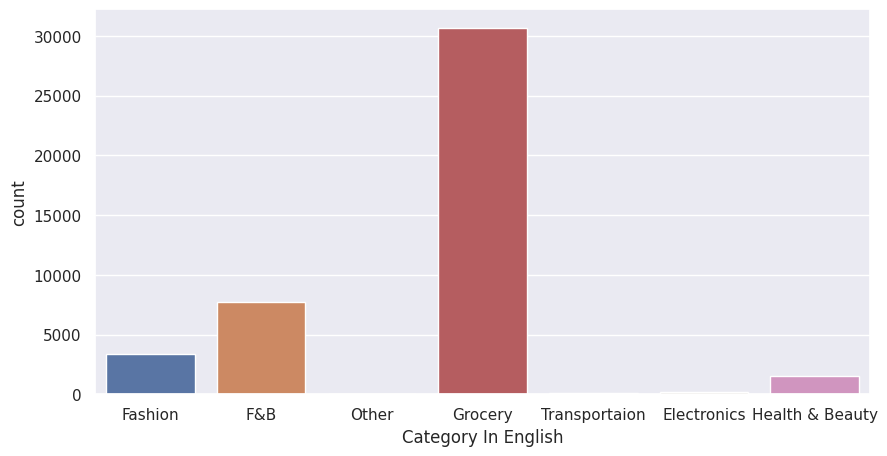

In [287]:
sns.countplot(data=data, x='Category In English')

In [288]:
len(data['User_Id']),len(data['User_Id'].unique())

(43672, 33457)

In [289]:
len(data['Mer_Id'].unique()),data['Mer_Id'].unique()

(56,
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56]))

<Axes: xlabel='Category In English', ylabel='Trx_Vlu'>

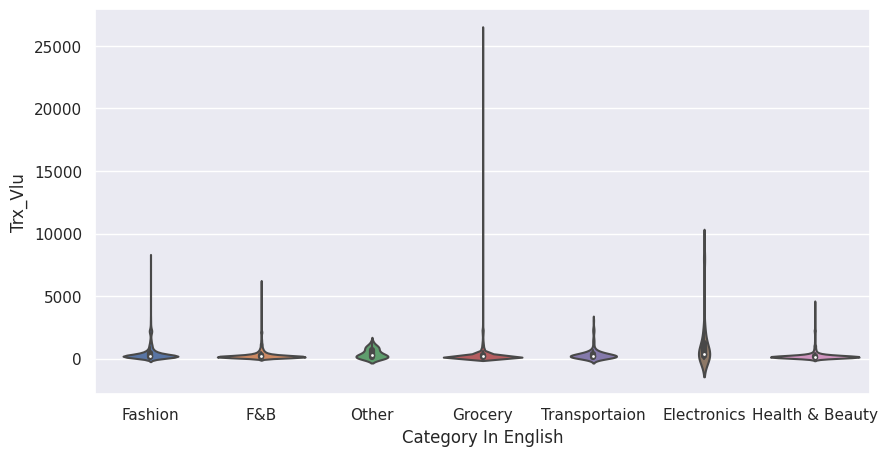

In [290]:
#Question: What is the distribution of transaction values for each category among customers?
sns.violinplot(x='Category In English', y='Trx_Vlu', data=data)

<Axes: xlabel='Customer_Age', ylabel='Trx_Rank'>

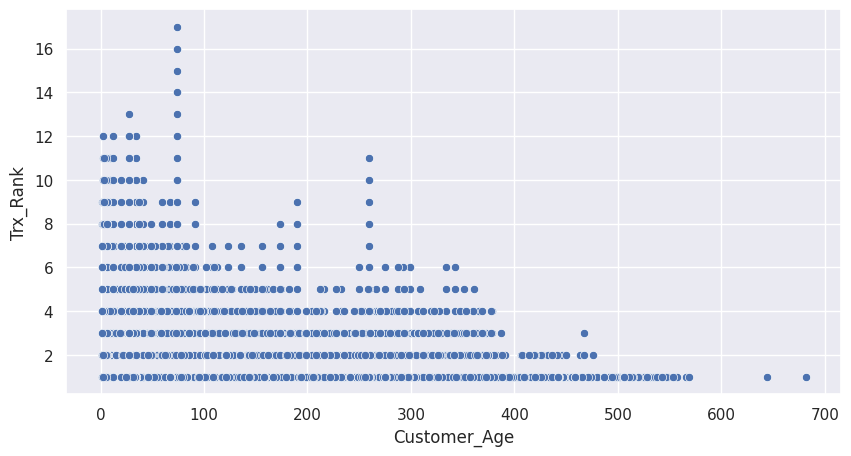

In [291]:
#Question: How does the transaction frequency vary with customer age?
sns.scatterplot(x='Customer_Age', y='Trx_Rank', data=data)

<Axes: xlabel='Category In English', ylabel='Trx_Age'>

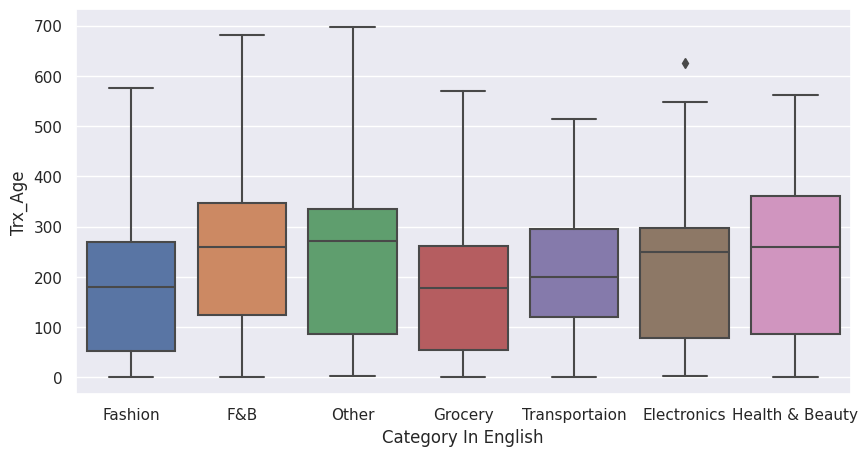

In [292]:
#Question: What is the distribution of transaction ages for each category?
sns.boxplot(x='Category In English', y='Trx_Age', data=data)

In [293]:
# Perform RFM Clustering
rfm = data[['Trx_Rank', 'Trx_Age', 'Customer_Age']].copy()
rfm

,Trx_Rank,Trx_Age,Customer_Age
0,1,362,362
1,1,371,368
2,2,368,368
3,1,558,34
4,1,413,413
...,...,...,...
43667,1,27,27
43668,1,31,31
43669,1,25,25
43670,1,2,2


In [294]:
# Perform RFM clustering
rfm = data[['Customer_Age', 'Trx_Rank', 'Trx_Vlu']]
scaler=StandardScaler()
rfm_scaled=scaler.fit_transform(rfm)
rfm_scaled

array([[ 1.89932209, -0.34154969,  2.92335809],
       [ 1.95160369, -0.34154969,  1.37027934],
       [ 1.95160369,  0.94621324,  0.90122871],
       ...,
       [-1.03716097, -0.34154969, -0.36694521],
       [-1.23757376, -0.34154969, -0.57193771],
       [-1.23757376,  0.94621324, -0.57193771]])

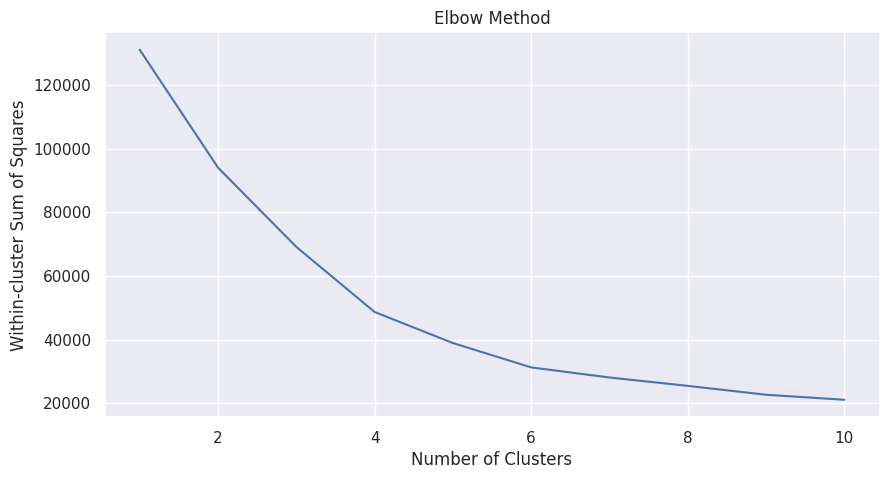

In [295]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.title('Elbow Method')
plt.show()

In [296]:
import joblib
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(rfm_scaled)
joblib.dump(kmeans, 'rfm_model.pkl')
file_path = 'updated.csv'
data.to_csv(file_path, index=False)
data

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Id,Cluster
0,1,20140,2014.0,362,362,Fashion,21053,0,3
1,1,11200,1120.0,371,368,Fashion,26472,0,2
2,2,8500,850.0,368,368,Fashion,26472,0,2
3,1,1980,198.0,558,34,Fashion,27075,0,1
4,1,2400,240.0,413,413,Fashion,27417,0,2
...,...,...,...,...,...,...,...,...,...
43667,1,3050,305.0,27,27,F&B,26865,55,1
43668,1,3120,312.0,31,31,F&B,27128,55,1
43669,1,1200,120.0,25,25,F&B,28814,55,1
43670,1,20,2.0,2,2,Other,29107,56,1
